## CNR para comparar 2 regiones cuadradas

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def CNR(heatmap):
# Example: Generate a heatmap

    signal_region = heatmap[40:60, 40:60]  # Example region of interest
    background_region = heatmap[10:25, 10:25]  # Example background region


    # Calculate mean intensity for signal and background
    mu_signal = np.mean(signal_region)
    mu_background = np.mean(background_region)

    # Calculate the noise (standard deviation of the background)
    sigma_noise = np.std(background_region)

    # Calculate the CNR
    cnr = abs(mu_signal - mu_background) / sigma_noise

    print(f"CNR: {cnr}")

    # Optionally plot the heatmap
    # plt.imshow(heatmap, cmap='viridis')
    # plt.colorbar()
    # plt.show()


## Heatmap from CSV generator function

In [69]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def heatmap_array(directory, csv_name, x_branch, y_branch, size, num):
    
    csv_file = os.path.join(directory, csv_name)
    print(csv_file)
    df = pd.read_csv(csv_file)

    x_data = df[x_branch]
    y_data = df[y_branch]

    # Compute a 2D histogram (heatmap array)
    heatmap, x_edges, y_edges = np.histogram2d(
        x_data, 
        y_data, 
        bins=[np.arange(-size, size + 1, size/num), np.arange(-size, size + 1, size/num)]
    )
    
    # heatmap is the array, x_edges and y_edges are the bin edges
    return heatmap, x_edges, y_edges

## Heatmap CNR

### Heatmap individual

csv/Sim5.csv


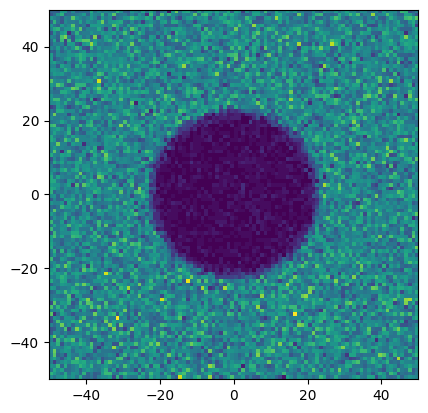

In [70]:
# Create heatmap from CSV
directory = 'csv/'
x_branch = "PositionX"
y_branch = "PositionY"
width  = 800
height = 800
size = 50 # la matriz creada será de (size*2)x(size*2) puntos
num = 50 # número de puntos por bin
csv_name = "Sim5.csv"
heatmap, x_edges, y_edges = heatmap_array(directory, csv_name, x_branch, y_branch, size, num)
plt.imshow(heatmap, cmap='viridis', extent =[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])

In [71]:
print(heatmap)

[[10. 10.  9. ...  8. 10. 13.]
 [ 8. 11. 16. ... 17. 12.  8.]
 [16. 14. 12. ... 22. 19. 23.]
 ...
 [12. 19. 15. ... 21.  9. 12.]
 [20. 17. 14. ... 12. 10. 13.]
 [15. 12. 15. ... 16. 15. 14.]]


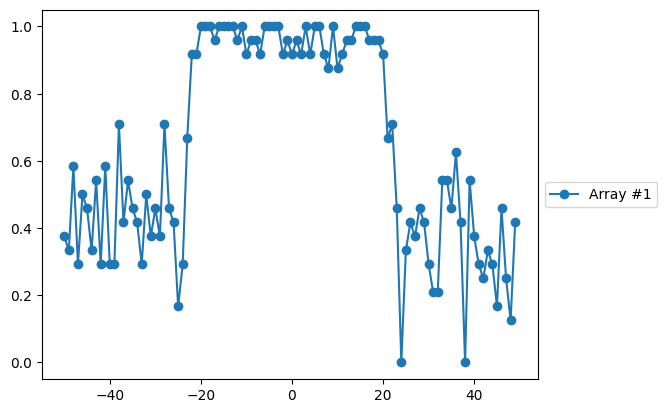

0.64125
[0.375      0.33333333 0.58333333 0.29166667 0.5        0.45833333
 0.33333333 0.54166667 0.29166667 0.58333333 0.29166667 0.29166667
 0.70833333 0.41666667 0.54166667 0.45833333 0.41666667 0.29166667
 0.5        0.375      0.45833333 0.375      0.70833333 0.45833333
 0.41666667 0.16666667 0.29166667 0.66666667 0.91666667 0.91666667
 1.         1.         1.         0.95833333 1.         1.
 1.         1.         0.95833333 1.         0.91666667 0.95833333
 0.95833333 0.91666667 1.         1.         1.         1.
 0.91666667 0.95833333 0.91666667 0.95833333 0.91666667 1.
 0.91666667 1.         1.         0.91666667 0.875      1.
 0.875      0.91666667 0.95833333 0.95833333 1.         1.
 1.         0.95833333 0.95833333 0.95833333 0.91666667 0.66666667
 0.70833333 0.45833333 0.         0.33333333 0.41666667 0.375
 0.45833333 0.41666667 0.29166667 0.20833333 0.20833333 0.54166667
 0.54166667 0.45833333 0.625      0.41666667 0.         0.54166667
 0.375      0.29166667 0.25     

In [72]:
# Plot 1D intensity profile at row = x
x = 50
hm = heatmap[x]
row = 1 - heatmap[x]/max(heatmap[x])
plt.plot(
    x_edges[:-1],
    row,
    marker="o",
    label=f"Array #1",
)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()
print(np.average(row))
print(row)

In [67]:
# start is the start row number and end is the end row number
# Background is every value in which window average < row average * 1.1 (arbitrary value); everything else is signal
window_size = 5
background = np.array([])
signal = np.array([])
start = 30
end = 70
for i in range(start, end):
    row = 1 - heatmap[i]/max(heatmap[i])
    new_arr = row.copy()
    avg = np.average(row)
    for j in range(len(row) - window_size + 1):
        window_avg = np.mean(row[j:j+window_size])
        new_arr[j + window_size//2] = window_avg  # Replace the middle element with the average
    for i, val in enumerate(new_arr):
        if val < avg*1.1:
            background = np.append(background, row[i])
        else:
            signal = np.append(signal, row[i])
signal_avg = np.average(signal)
backgnd_avg = np.average(background)
backgn_std = np.std(background)
CNR = (signal_avg-backgnd_avg)/backgn_std
print("CNR for "+csv_name+" is: "+str(CNR))

IndexError: index 30 is out of bounds for axis 0 with size 10

## Multiple heatmap

csv/Sim0.csv
CNR: 2.383255943766457
None


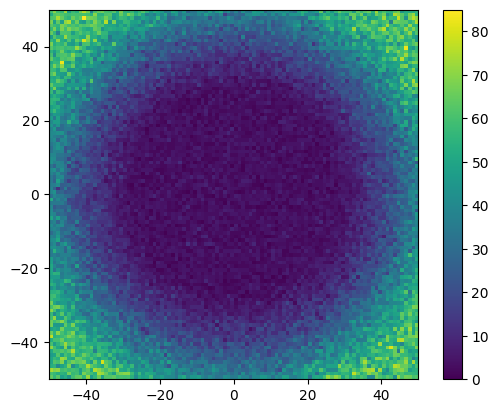

csv/Sim1.csv
CNR: 5.659348221944273
None


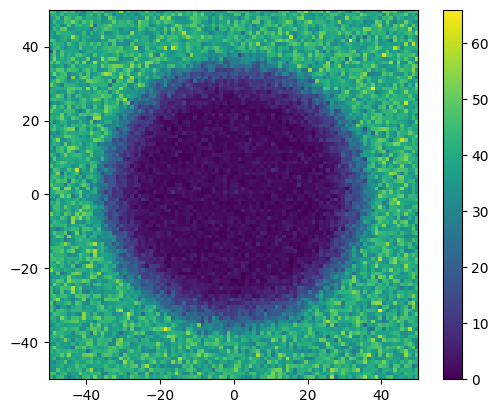

csv/Sim2.csv
CNR: 4.809836514874176
None


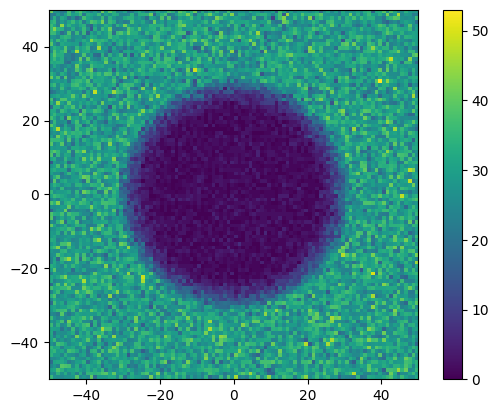

csv/Sim3.csv
CNR: 4.570516799895857
None


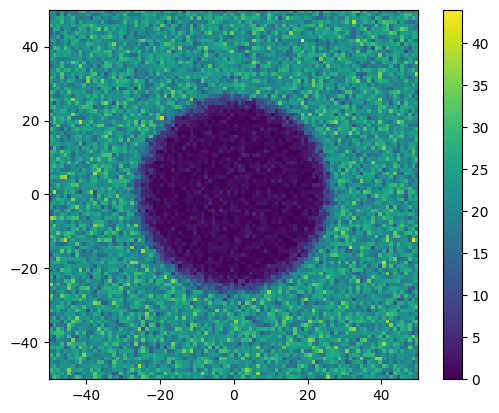

csv/Sim4.csv
CNR: 4.104831021917581
None


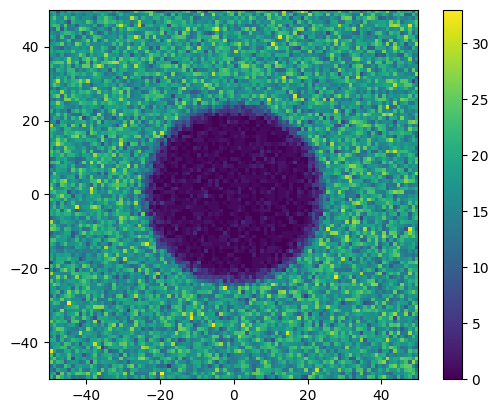

csv/Sim5.csv
CNR: 4.0003788106916645
None


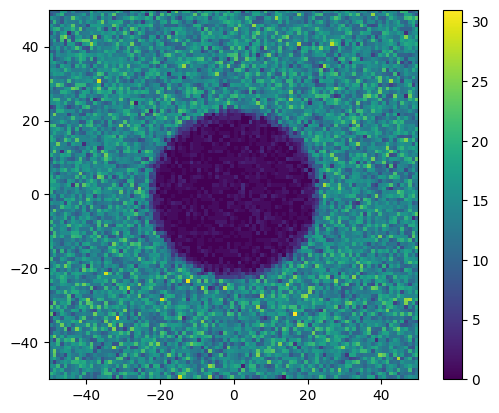

csv/Sim6.csv
CNR: 3.55252450313162
None


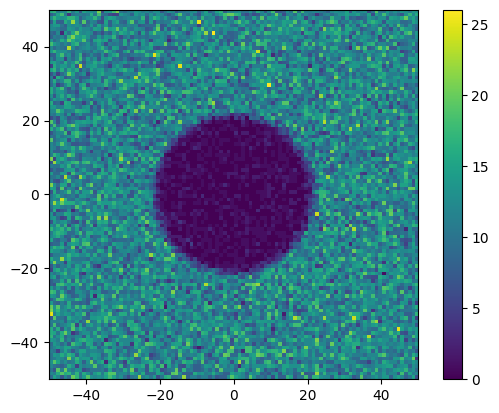

csv/Sim7.csv
CNR: 2.813030722442268
None


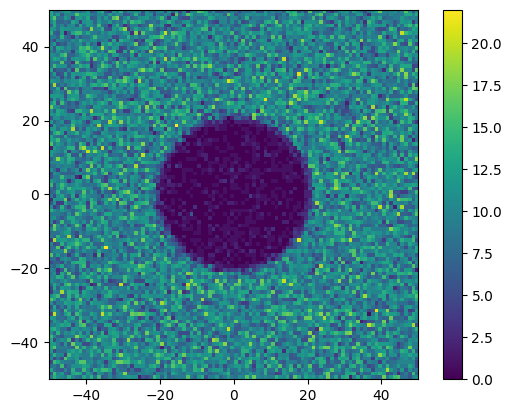

csv/Sim8.csv
CNR: 2.8082177674289865
None


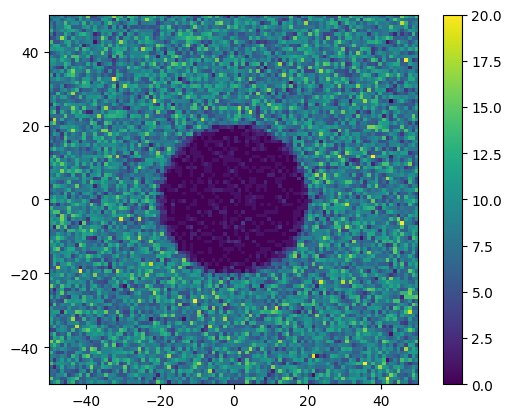

csv/Sim9.csv
CNR: 2.5874450597467833
None


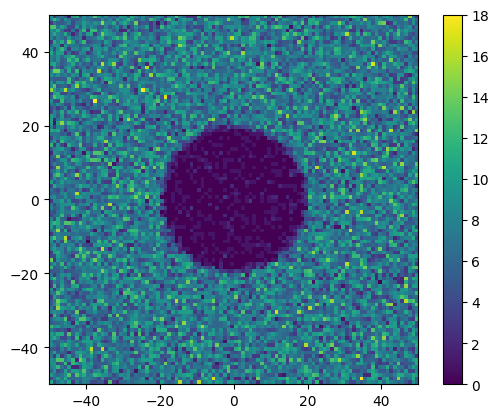

csv/Sim10.csv
CNR: 2.475207008686866
None


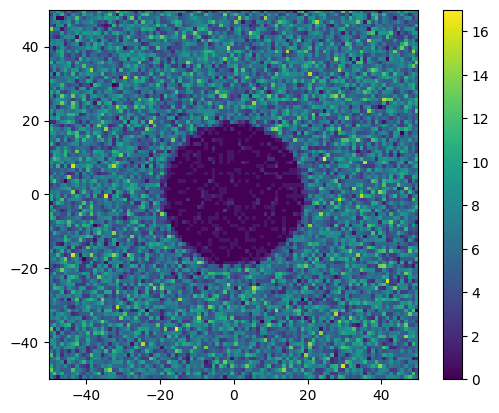

csv/Sim11.csv
CNR: 2.2170661898262756
None


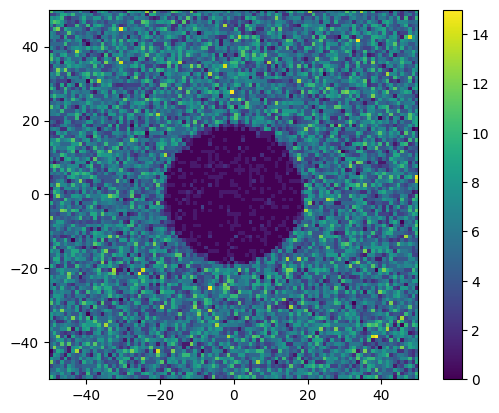

csv/Sim12.csv
CNR: 2.074135865359691
None


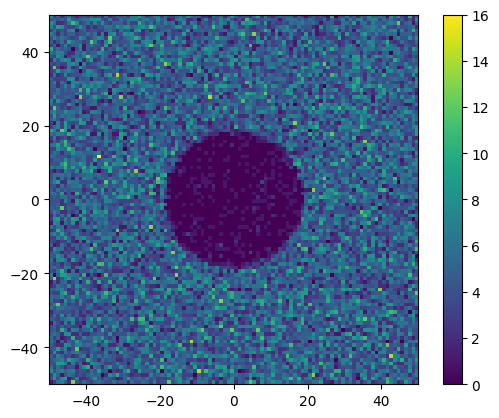

In [60]:
# Example usage:
directory = 'csv/'
x_branch = "PositionX"
y_branch = "PositionY"
width  = 800
height = 800
size = 50
num = 50

for i in range(13):
    csv_name = "Sim"+str(i)+".csv"

    heatmap, x_edges, y_edges = heatmap_array(directory, csv_name, x_branch, y_branch, size, num)
    # Display heatmap array (for debugging purposes)
    plt.imshow(heatmap, cmap='viridis', extent =[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])

    print(CNR(heatmap))
    plt.colorbar()
    plt.show()